<a href="https://colab.research.google.com/github/2303A54051/AIML/blob/main/LAB_10_KMEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

In [3]:
X.shape

(300, 2)

In [4]:
y_true.shape

(300,)

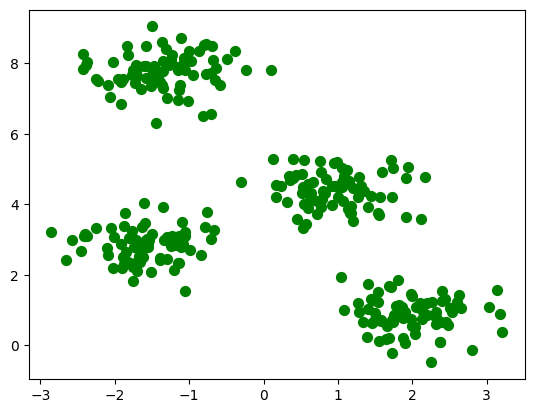

In [5]:
plt.scatter(X[:,0],X[:,1],s=50,color='green')

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans=KMeans(n_clusters=4)

In [8]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [9]:
y_kmeans=kmeans.predict(X)

In [10]:
centers=kmeans.cluster_centers_
centers

array([[-1.35241261,  7.76731726],
       [ 1.99469693,  0.8727049 ],
       [ 0.95415778,  4.39985544],
       [-1.57480456,  2.84532424]])

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans,y_true)

0.25

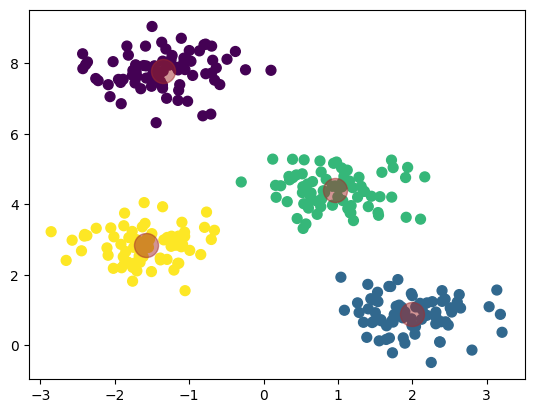

In [12]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='brown',s=300,alpha=0.5)

In [13]:
from sklearn.metrics import pairwise_distances_argmin

In [14]:
def find_clusters(X,n_clusters,rseed=2):
  rng=np.random.RandomState(rseed)
  i=rng.permutation(X.shape[0])[:n_clusters]
  centers=X[i]
  while True:
    labels=pairwise_distances_argmin(X,centers)
    new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
    if np.all(centers==new_centers):
      break
    centers=new_centers
  return centers,labels

In [15]:
labels=KMeans(2,random_state=0,n_init=10).fit_predict(X)

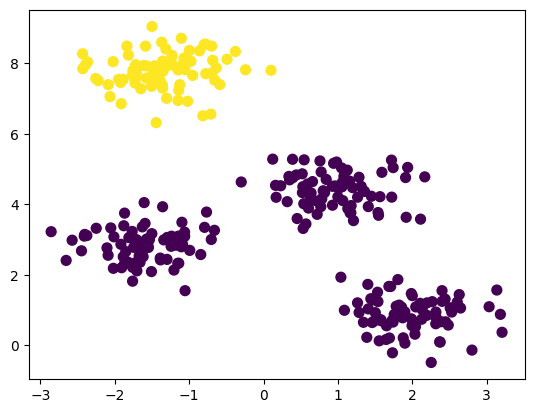

In [16]:
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

In [17]:
from sklearn.cluster import SpectralClustering

In [18]:
model=SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')

In [19]:
labels=model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


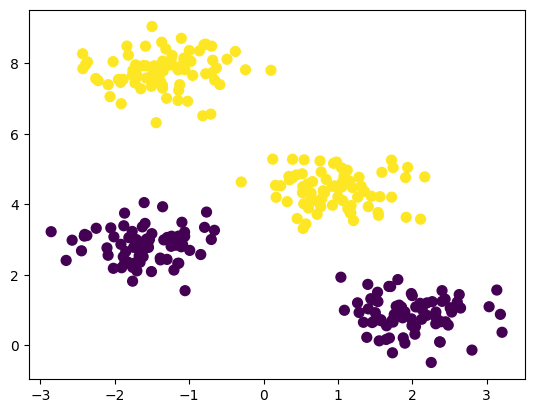

In [20]:
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

In [21]:
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=400,centers=4,cluster_std=0.7,random_state=0)
X=X[:,::-1]

In [22]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [23]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k',zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

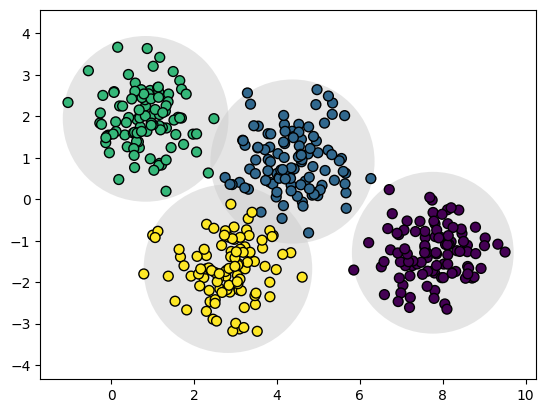

In [24]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, X)

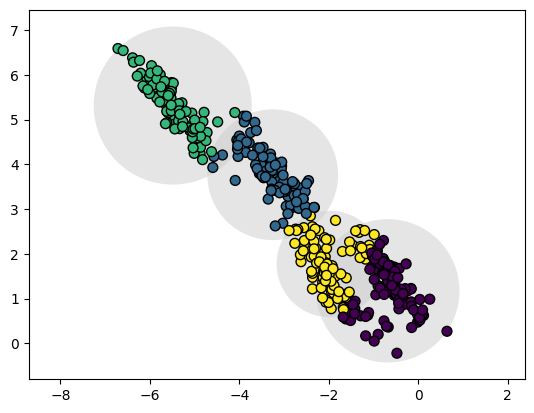

In [25]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, X_stretched)

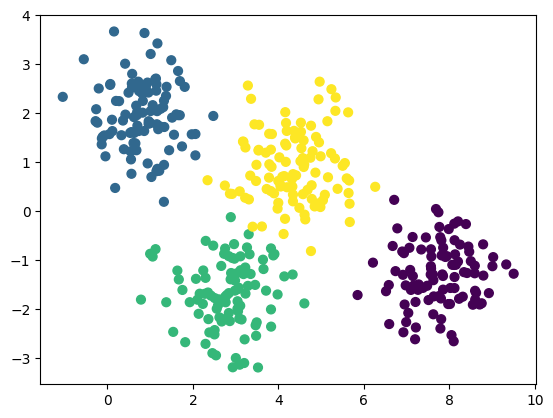

In [26]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [27]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.022 0.    0.    0.978]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.001 0.999]
 [0.    0.    1.    0.   ]]


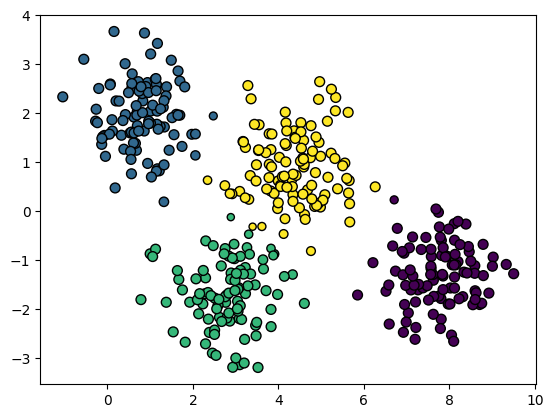

In [28]:
size = probs.max(1)/0.02  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='k', cmap='viridis', s=size);

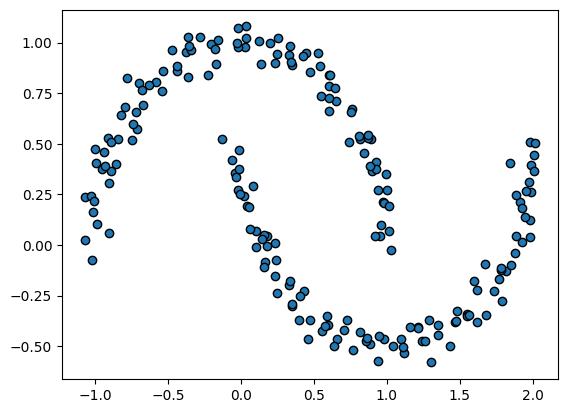

In [29]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1],edgecolor='k');

In [30]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2,edgecolor='k')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2,cmap='viridis',edgecolor='k')
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

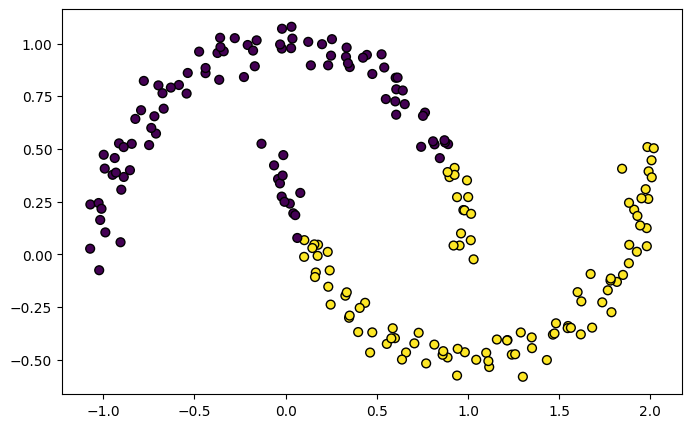

In [31]:
#No.Components determine the gmm structure and its distribution
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plt.figure(figsize=(8,5))
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2,edgecolor='k')
plot_gmm(gmm2, Xmoon)